# Predictive Analytics for Bike Shop

This notebook contains some analysis of bike shop data and two predictive models. One model predicts a categorical feature and the the other model predicts a numeric feature. The analysis and models were used for the final assesment for the __Principles of Machine Learning:__ _Python Edition_ (Microsoft DAT275x) course on edX.com. The notebook proceeds as follows.  First the data is imported and a few minor issues with it are addressed. Then the data is used to answer some basic questions, e.g. do married customers spend more per month on average than single customers? Next, I create some models for predicting whether customers bought a bike and evaluate them. Lastly, I create some models for predicting the average amount spent per month for a given customer and evaluate them.  


### Notes on Provided Data

Data File Name: AdvWorksCusts.csv

Contains Customer demographic data consisting of the following fields:
- CustomerID (integer): A unique customer identifier.
- Title (string): The customer's formal title (Mr, Mrs, Ms, Miss Dr, etc.)
- FirstName (string): The customer's first name.
- MiddleName (string): The customer's middle name.
- LastName (string): The customer's last name.
- Suffix (string): A suffix for the customer name (Jr, Sr, etc.)
- AddressLine1 (string): The first line of the customer's home address.
- AddressLine2 (string): The second line of the customer's home address.
- City (string): The city where the customer lives.
- StateProvince (string): The state or province where the customer lives.
- CountryRegion (string): The country or region where the customer lives.
- PostalCode (string): The postal code for the customer's address.
- PhoneNumber (string): The customer's telephone number.
- BirthDate (date): The customer's date of birth in the format YYYY-MM-DD.
- Education (string): The maximum level of education achieved by the customer:
-- Partial High School
-- High School
-- Partial College
-- Bachelors
-- Graduate Degree
- Occupation (string): The type of job in which the customer is employed:
-- Manual
-- Skilled Manual
-- Clerical
-- Management
-- Professional
- Gender (string): The customer's gender (for example, M for male, F for female, etc.)
- MaritalStatus (string): Whether the customer is married (M) or single (S).
- HomeOwnerFlag (integer): A Boolean flag indicating whether the customer owns their own home (1) or not (0).
- NumberCarsOwned (integer): The number of cars owned by the customer.
- NumberChildrenAtHome (integer): The number of children the customer has who live at home.
- TotalChildren (integer): The total number of children the customer has.
- YearlyIncome (decimal): The annual income of the customer.

Data File Name: AW_AveMonthSpend.csv

Contains Sales data for existing customers, consisting of the following fields:
- CustomerID (integer): The unique identifier for the customer.
- AveMonthSpend (decimal): The amount of money the customer spends with Adventure Works Cycles on average each month.

Data File Name: AW_BikeBuyer.csv

Contains Sales data for existing customers, consisting of the following fields:
- CustomerID (integer): The unique identifier for the customer.
- BikeBuyer (integer): A Boolean flag indicating whether a customer has previously purchased a bike (1) or not (0).

In [2]:
# Import Packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
# Import Training Data
data = pd.read_csv('AdvWorksCusts.csv')
class_labels = pd.read_csv('AW_BikeBuyer.csv')
regression_labels = pd.read_csv('AW_AveMonthSpend.csv')

# Import Test Data (Unlabeled for Course Assessment)
test = pd.read_csv('AW_test.csv')

In [4]:
print(data.columns)
print(class_labels.columns)
print(regression_labels.columns)

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome'],
      dtype='object')
Index(['CustomerID', 'BikeBuyer'], dtype='object')
Index(['CustomerID', 'AveMonthSpend'], dtype='object')


### Data Prep

Steps:
1. Drop Duplicates
2. Check for nulls 
3. Convert to proper data types


In [5]:
# Drop Duplicates
data.drop_duplicates(subset = ['CustomerID'], keep='last', inplace=True)
class_labels.drop_duplicates(subset = ['CustomerID'], keep='last', inplace=True)
regression_labels.drop_duplicates(subset = ['CustomerID'], keep='last', inplace=True)

In [6]:
# Check for nulls
data.isnull().sum()

CustomerID                  0
Title                   16316
FirstName                   0
MiddleName               6951
LastName                    0
Suffix                  16402
AddressLine1                0
AddressLine2            16131
City                        0
StateProvinceName           0
CountryRegionName           0
PostalCode                  0
PhoneNumber                 0
BirthDate                   0
Education                   0
Occupation                  0
Gender                      0
MaritalStatus               0
HomeOwnerFlag               0
NumberCarsOwned             0
NumberChildrenAtHome        0
TotalChildren               0
YearlyIncome                0
dtype: int64

Since these columns with null values are not relevant for prediction I will drop them. Since the names, address, phone number, city, postal code, and State/Province Name will not be used in the model construction I will drop those as well (each is either not relevant or has to many levels).

In [7]:
# Drop Columns
data.drop(columns=['Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix', 'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName', 'PostalCode', 'PhoneNumber'], inplace=True)

In [8]:
# Check data types
data.dtypes

CustomerID               int64
CountryRegionName       object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
dtype: object

We can see that BirthDate has the wrong data type.

In [9]:
# Fix BirthDate data type
data['BirthDate'] = pd.to_datetime(data['BirthDate'])

In [10]:
# Create DataFrame with Labels
df = pd.merge(pd.merge(data, class_labels, on='CustomerID'), regression_labels, on='CustomerID')

In [11]:
df.columns

Index(['CustomerID', 'CountryRegionName', 'BirthDate', 'Education',
       'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'BikeBuyer', 'AveMonthSpend'],
      dtype='object')

### Some Basic Questions to Answer:
1. What is the minimum of the avergae spent per month?

2. What is the maximum of the avergae spent per month?

3. What is the mean of the avergae spent per month?

4. What is the median of the avergae spent per month?

5. What is the standard deviation of the avergae spent per month?

In [12]:
# 1. Minimum AveMonthSpend
print('Minimum AveMonthSpend: ', df.AveMonthSpend.min())

#2. Maximum AveMonthSpend
print('Maximum AveMonthSpend: ', df.AveMonthSpend.max())

#3. Mean AveMonthSpend
print('Mean of AveMonthSpend: ', df.AveMonthSpend.mean())

#4. Median AveMonthSpend
print('Median AveMonthSpend: ', df.AveMonthSpend.median())

#5. Standard Deviation AveMonthSpend
print('Standard Deviation of AveMonthSpend: ', df.AveMonthSpend.std())


Minimum AveMonthSpend:  22
Maximum AveMonthSpend:  176
Mean of AveMonthSpend:  72.39100219458669
Median AveMonthSpend:  68.0
Standard Deviation of AveMonthSpend:  27.26992129964956


6. The distribution of the values in the BikeBuyer column indicates which of the following:
 - Fewer customers have bought bikes than have not bought bikes.
 - More customers have bought bikes than have not bought bikes.
 - The same number of customers have bought bikes as have not bought bikes.

In [13]:
print(df.BikeBuyer.value_counts())

0    10949
1     5455
Name: BikeBuyer, dtype: int64


We can see that fewer customers have bought bikes than have not bought bikes (with an approximately 1:2 ratio).

7. Select the correct order (from lowest to highest) that ranks the median YearlyIncome by Occupation:
 - Clerical, Manual, Skilled Manual, Professional, Management
 - Manual, Skilled Manual, Clerical, Management, Professional
 - Manual, Clerical, Skilled Manual, Professional, Management
 - Manual, Clerical, Skilled Manual, Management, Professional

In [14]:
print(df.groupby('Occupation').YearlyIncome.median().sort_values())

Occupation
Manual             21722.0
Clerical           49481.0
Skilled Manual     66471.5
Professional       99058.0
Management        118781.0
Name: YearlyIncome, dtype: float64


We can see that the correct order (from lowest to highest) that ranks the median YearlyIncome by Occupation is Manual, Clerical, Skilled Manual, Professional, Management.

8. Based on their age at the time when the data was collected (1st January 1998), which group of customers accounts for the highest AveMonthSpend values?
 - Females under 25 years of age.
 - Males under 25 years of age.
 - Females aged between 25 and 45.
 - Males aged between 25 and 45.
 - Females over 55 years of age.
 - Males over 55 years of age.



In [15]:
#Create Age Column
from datetime import datetime
df['DateCollected'] = '1998-1-1'
df['DateCollected'] = pd.to_datetime(df['DateCollected'])
df['Age'] = df.DateCollected.sub(df.BirthDate).astype('<m8[Y]')

In [16]:
# Create Boolean Masks
Female = df.Gender == 'F'
Male = df.Gender == 'M'
Under_25 = df.Age < 25
Over_55 = df.Age >= 55
In_25_45 = (df.Age >= 25) & (df.Age < 45)
Female_Under_25 = Female & Under_25 
Male_Under_25 = Male & Under_25
Female_Over_55 = Female & Over_55
Male_Over_55 = Male & Over_55
Female_In_25_45 = Female & In_25_45
Male_In_25_45 = Male & In_25_45

# Use Masks to Create Indicator Variable for Each Group
df['Female_Under_25'] = Female_Under_25.astype(int)
df['Male_Under_25'] = Male_Under_25.astype(int)
df['Female_Over_55'] = Female_Over_55.astype(int)
df['Male_Over_55'] = Male_Over_55.astype(int)
df['Female_In_25_45'] = Female_In_25_45.astype(int)
df['Male_In_25_45'] = Male_In_25_45.astype(int)

# Print sum of AveMonthSpend for each group
gen_age_list = ['Female_Under_25', 'Male_Under_25', 'Female_Over_55', 'Male_Over_55', 'Female_In_25_45', 'Male_In_25_45']

for i in gen_age_list:
    print(i,': ', df[df[i] == 1].AveMonthSpend.sum())

Female_Under_25 :  70476
Male_Under_25 :  107683
Female_Over_55 :  24935
Male_Over_55 :  37695
Female_In_25_45 :  293929
Male_In_25_45 :  473092


We can see Males aged between 25 and 45 account for the highest AveMonthSpend values.

9. Which of the following statements about AveMonthSpend are true?
 - Married customers have a higher median AvgMonthSpend than single customers.
 - Customers with no car have a higher median AvgMonthSpend than customers with three or more cars.
 - Male customers have a higher median AvgMonthSpend than female customers.
 - Female customers have a wider range of AvgMonthSpend values than male customers.
 - Customers with no children at home have a lower median AvgMonthSpend values than customers with one or more children at home.

In [17]:
df.groupby('MaritalStatus').AveMonthSpend.median()

MaritalStatus
M    74
S    62
Name: AveMonthSpend, dtype: int64

In [18]:
print(df[df.NumberCarsOwned == 0].AveMonthSpend.median())
print(df[df.NumberCarsOwned > 0].AveMonthSpend.median())

65.0
68.0


In [19]:
df.groupby('Gender').AveMonthSpend.median()

Gender
F    52
M    79
Name: AveMonthSpend, dtype: int64

In [20]:
print(df[df.Gender == 'M'].AveMonthSpend.max() - df[df.Gender == 'M'].AveMonthSpend.min())
print(df[df.Gender == 'F'].AveMonthSpend.max() - df[df.Gender == 'F'].AveMonthSpend.min())

147
92


In [21]:
print(df[df.NumberChildrenAtHome == 0].AveMonthSpend.median())
print(df[df.NumberChildrenAtHome > 0].AveMonthSpend.median())

57.0
88.0


- We can see that married customers __do__ have a higher median AvgMonthSpend than single customers.
- We can see that customers with no car __do not__ have a higher median AvgMonthSpend than customers with three or more cars.
- We can see that male customers __do__ have a higher median AvgMonthSpend than female customers.
- We can see that female customers __do not__ have a wider range of AvgMonthSpend values than male customers.
- We can see that customers with no children at home __do__ have a lower median AvgMonthSpend values than customers with one or more children at home.

10. Which of the following statements about BikeBuyer are true?
 - The median YearlyIncome is higher for customers who bought a bike than for customers who didn't.
 - The median number of cars owned by customers who bought a bike is lower than for customers who didn't.
 - The most common occupation type for customers who bought a bike is skilled manual.
 - Male customers are more likely to buy bikes than female customers.
 - A maried customer is more likely to buy a bike.

In [22]:
df.groupby('BikeBuyer').YearlyIncome.median()

BikeBuyer
0    65957
1    96084
Name: YearlyIncome, dtype: int64

In [23]:
df.groupby('BikeBuyer').NumberCarsOwned.median()

BikeBuyer
0    1
1    2
Name: NumberCarsOwned, dtype: int64

In [24]:
df.groupby('BikeBuyer').Occupation.value_counts()

BikeBuyer  Occupation    
0          Skilled Manual    2903
           Professional      2738
           Clerical          1981
           Management        1702
           Manual            1625
1          Professional      2184
           Skilled Manual    1135
           Management        1016
           Clerical           616
           Manual             504
Name: Occupation, dtype: int64

In [25]:
df.groupby('Gender').BikeBuyer.value_counts()

Gender  BikeBuyer
F       0            5881
        1            2233
M       0            5068
        1            3222
Name: BikeBuyer, dtype: int64

In [26]:
df.groupby('MaritalStatus').BikeBuyer.value_counts()

MaritalStatus  BikeBuyer
M              0            6653
               1            2199
S              0            4296
               1            3256
Name: BikeBuyer, dtype: int64

- We can see that the median YearlyIncome __is__ higher for customers who bought a bike than for customers who didn't.
- We can see that the median number of cars owned by customers who bought a bike __is not__ lower than for customers who didn't.
- We can see that the most common occupation type for customers who bought a bike __is not__ skilled manual.
- We can see that male customers __are__ more likely to buy bikes than female customers.
- We can see that a maried customer __is not__ more likely to buy a bike.

# Classification

Steps:
1. Convert ordinal data from strings to numbers and get dummy variables for categroical data 
2. Feature Selection
3. Make pipeline
4. Find best model

In [27]:
df.columns

Index(['CustomerID', 'CountryRegionName', 'BirthDate', 'Education',
       'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'BikeBuyer', 'AveMonthSpend', 'DateCollected', 'Age',
       'Female_Under_25', 'Male_Under_25', 'Female_Over_55', 'Male_Over_55',
       'Female_In_25_45', 'Male_In_25_45'],
      dtype='object')

In [28]:
#Get rid of anything that is not a potential feature, e.g. CustomerID.
features = df[['Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'Age', 'Female_Under_25',
       'Male_Under_25', 'Female_Over_55', 'Male_Over_55', 'Female_In_25_45',
       'Male_In_25_45']]

In [29]:
#Create dummy variable for categorical variables.
dummies = pd.get_dummies(features[['Gender', 'MaritalStatus']], drop_first=True)
features = pd.concat([features, dummies], axis=1)
features = features.drop(columns=['Gender', 'MaritalStatus'])

In [30]:
#Map Ordinal Levels to Integers
education_map = {'Partial High School':0,  'High School':1,  'Partial College':2, 'Bachelors ':3, 'Graduate Degree':4} 
features['Education'] = features['Education'].map(education_map) 

occupation_map = {'Manual':0, 'Skilled Manual':1, 'Clerical':2, 'Management':3, 'Professional':4} 
features['Occupation'] = features['Occupation'].map(occupation_map)

features.head()

,Education,Occupation,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age,Female_Under_25,Male_Under_25,Female_Over_55,Male_Over_55,Female_In_25_45,Male_In_25_45,Gender_M,MaritalStatus_S
0,3,4,1,0,0,2,137947,31.0,0,0,0,0,0,1,1,0
1,3,4,0,1,3,3,101141,32.0,0,0,0,0,0,1,1,1
2,3,4,1,1,3,3,91945,32.0,0,0,0,0,0,1,1,0
3,3,4,0,1,0,0,86688,29.0,0,0,0,0,1,0,0,1
4,3,4,1,4,5,5,92771,29.0,0,0,0,0,1,0,0,1


For some basic feature selection I will use a chi-squared test and look at the p-values.

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

k_best = SelectKBest(chi2, k='all')
k_best.fit_transform(features, class_labels['BikeBuyer'])
p_values = pd.DataFrame({'column':features.columns, 'p_value':k_best.pvalues_}).sort_values('p_value')
display(p_values)

,column,p_value
4,NumberChildrenAtHome,0.000000e+00
6,YearlyIncome,0.000000e+00
5,TotalChildren,3.826366e-276
7,Age,2.428419e-242
13,Male_In_25_45,5.874451e-158
1,Occupation,9.113937e-90
3,NumberCarsOwned,8.009438e-86
15,MaritalStatus_S,6.412836e-74
10,Female_Over_55,1.203697e-48
11,Male_Over_55,7.926407e-45


In [32]:
#Drop Features with high p-value
train_features = features.drop(columns=['Female_In_25_45', 'HomeOwnerFlag'])

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

X = train_features
y = df.BikeBuyer
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1234)


# Pipeline dictionary
pipeline_dict = {'l1':make_pipeline(StandardScaler(),LogisticRegression(penalty='l1', random_state=123)), 
                 'l2':make_pipeline(StandardScaler(),LogisticRegression(penalty='l2', random_state=123)),
                 'rf':make_pipeline(StandardScaler(),RandomForestClassifier(random_state=123)),
                 'gb':make_pipeline(StandardScaler(),GradientBoostingClassifier(random_state=123))}

# Logistic Regression hyperparameters
l1_hyperparameters = {'logisticregression__C' : np.linspace(1e-3, 1e3, 10),}

l2_hyperparameters = {'logisticregression__C' : np.linspace(1e-3, 1e3, 10),}

# Random Forest hyperparameters
rf_hyperparameters = {'randomforestclassifier__n_estimators': [100, 200], 
                      'randomforestclassifier__max_features': ['auto', 'sqrt', 0.33]}

# Boosted Tree hyperparameters
gb_hyperparameters = {'gradientboostingclassifier__n_estimators':[100,200],
                      'gradientboostingclassifier__learning_rate':[.05,.1,.2],
                      'gradientboostingclassifier__max_depth':[1,3,5]}

# Create hyperparameters dictionary
hyperparameters = {'l1':l1_hyperparameters,
                   'l2':l2_hyperparameters,
                   'rf':rf_hyperparameters,
                   'gb':gb_hyperparameters}

# Create empty dictionary called fitted_models
fitted_models={}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for key, value in pipeline_dict.items():
    # Create cross-validation object from pipeline and hyperparameters
     model = GridSearchCV(pipeline_dict[key], hyperparameters[key], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
     model.fit(X_train,y_train)
    
    # Store model in fitted_models[name] 
     fitted_models[key] = model
    
    # Print '{name} has been fitted'
     print('{} has been fitted'.format(key))

C:\Users\jpkel\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jpkel\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\jpkel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


l1 has been fitted


C:\Users\jpkel\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jpkel\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\jpkel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


l2 has been fitted


C:\Users\jpkel\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jpkel\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


rf has been fitted


C:\Users\jpkel\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jpkel\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


gb has been fitted


In [35]:
# Display best_score_ for each fitted model
for key, value in fitted_models.items():
    print(key, 'score: ', fitted_models[key].best_score_)
    
# Display AUC score for each fitted model
for key, value in fitted_models.items():
    pred = value.predict_proba(X_test)
    pred = [p[1] for p in pred]
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    print(key, 'auc: ', auc(fpr,tpr))

l1 score:  0.7940257563057228
l2 score:  0.7940257563057228
rf score:  0.760268231349539
gb score:  0.8020269755391298
l1 auc:  0.8434515887803085
l2 auc:  0.8434566586815722
rf auc:  0.8149697284645381
gb auc:  0.8576597758258657


C:\Users\jpkel\Anaconda3\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\jpkel\Anaconda3\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\jpkel\Anaconda3\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\jpkel\Anaconda3\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


C:\Users\jpkel\Anaconda3\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\jpkel\Anaconda3\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\jpkel\Anaconda3\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\jpkel\Anaconda3\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


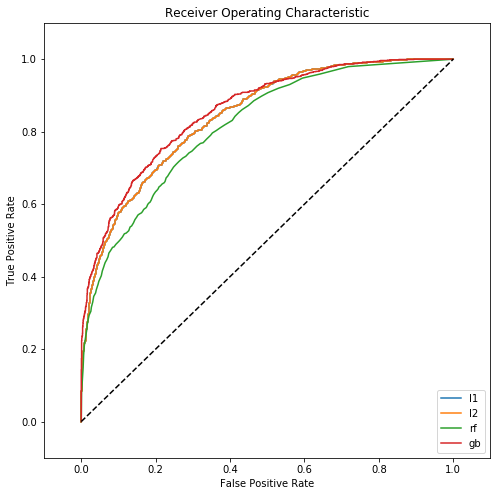

In [36]:
# Display ROC Curves for each fitted model
    # Initialize figure
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

for key, value in fitted_models.items():
    pred = value.predict_proba(X_test)
    pred = [p[1] for p in pred]
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=key)
    plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Now I will prep test set for model predictions.

In [37]:
#test.drop(columns=['Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix', 'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName', 'PostalCode', 'PhoneNumber'], inplace=True)
test['BirthDate'] = pd.to_datetime(test['BirthDate'])
test['DateCollected'] = '1998-1-1'
test['DateCollected'] = pd.to_datetime(test['DateCollected'])
test['Age'] = test.DateCollected.sub(test.BirthDate).astype('<m8[Y]')
test['Female_Under_25'] = Female_Under_25.astype(int)
test['Male_Under_25'] = Male_Under_25.astype(int)
test['Female_Over_55'] = Female_Over_55.astype(int)
test['Male_Over_55'] = Male_Over_55.astype(int)
test['Female_In_25_45'] = Female_In_25_45.astype(int)
test['Male_In_25_45'] = Male_In_25_45.astype(int)

test_attributes = test[['Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'Age', 'Female_Under_25',
       'Male_Under_25', 'Female_Over_55', 'Male_Over_55', 'Female_In_25_45',
       'Male_In_25_45']]

test_dummies = pd.get_dummies(test_attributes[['Gender', 'MaritalStatus']], drop_first=True)
test_attributes = pd.concat([test_attributes, test_dummies], axis=1)
test_attributes = test_attributes.drop(columns=['Gender', 'MaritalStatus'])

education_map = {'Partial High School':0,  'High School':1,  'Partial College':2, 'Bachelors ':3, 'Graduate Degree':4} 
test_attributes['Education'] = test_attributes['Education'].map(education_map) 

occupation_map = {'Manual':0, 'Skilled Manual':1, 'Clerical':2, 'Management':3, 'Professional':4} 
test_attributes['Occupation'] = test_attributes['Occupation'].map(occupation_map)

test_features = test_attributes.drop(columns=['Female_In_25_45', 'HomeOwnerFlag'])

submission = pd.DataFrame(fitted_models['gb'].predict(test_features), index =test_features.index, columns=['BikeBuyer'])
submission.to_csv('bike_predictions.csv')

C:\Users\jpkel\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


This test submission has an accuracy of .776.

# Regression

In [38]:
#Redo of feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

k_best = SelectKBest(f_classif, k='all')
k_best.fit_transform(features, regression_labels['AveMonthSpend'])
p_values = pd.DataFrame({'column':features.columns, 'p_value':k_best.pvalues_}).sort_values('p_value')
display(p_values)

,column,p_value
1,Occupation,0.000000e+00
3,NumberCarsOwned,0.000000e+00
4,NumberChildrenAtHome,0.000000e+00
5,TotalChildren,0.000000e+00
6,YearlyIncome,0.000000e+00
8,Female_Under_25,0.000000e+00
12,Female_In_25_45,0.000000e+00
13,Male_In_25_45,0.000000e+00
14,Gender_M,0.000000e+00
10,Female_Over_55,7.380627e-297


It appears all attributes are likely worth keeping so we can use the DataFrame 'features'.

In [39]:
# Import Elastic Net, Ridge Regression, and Lasso Regression
from sklearn.linear_model import ElasticNet, Ridge, Lasso

# Import Random Forest and Gradient Boosted Trees
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

X = features
y = df.AveMonthSpend

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1234)

# Create pipelines dictionary
pipelines= {'lasso':make_pipeline(StandardScaler(), Lasso(random_state=123)), 'ridge':make_pipeline(StandardScaler(), Ridge(random_state=123)), 'enet':make_pipeline(StandardScaler(), ElasticNet(random_state=123))}

# Add a pipeline for 'rf'
pipelines['rf'] = make_pipeline(StandardScaler(),RandomForestRegressor(random_state=123))
# Add a pipeline for 'gb'
pipelines['gb'] = make_pipeline(StandardScaler(),GradientBoostingRegressor(random_state=123))

# Lasso hyperparameters
lasso_hyperparameters ={'lasso__alpha':[.001, .005, .01, .05, .1, .5, 1., 5., 10.]}
# Ridge hyperparameters
ridge_hyperparameters ={'ridge__alpha':[.001, .005, .01, .05, .1, .5, 1., 5., 10.]}
# Elastic Net hyperparameters
enet_hyperparameters ={'elasticnet__alpha':[.001, .005, .01, .05, .1, .5, 1, 5, 10],'elasticnet__l1_ratio':[.1,.3,.5,.7,.9]}
# Random forest hyperparameters
rf_hyperparameters={'randomforestregressor__n_estimators':[100,200], 'randomforestregressor__max_features':['auto','sqrt',0.33]}
# Boosted tree hyperparameters
gb_hyperparameters={'gradientboostingregressor__n_estimators':[100,200],'gradientboostingregressor__learning_rate':[.05,.1,.2],'gradientboostingregressor__max_depth':[1,3,5]}

# Create hyperparameters dictionary
hyperparameters={'lasso':lasso_hyperparameters,'ridge':ridge_hyperparameters,'enet':enet_hyperparameters,'gb':gb_hyperparameters,'rf':rf_hyperparameters}

# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipelines[name], hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

C:\Users\jpkel\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jpkel\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


lasso has been fitted.


C:\Users\jpkel\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jpkel\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


ridge has been fitted.


C:\Users\jpkel\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jpkel\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


enet has been fitted.


C:\Users\jpkel\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jpkel\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


rf has been fitted.


C:\Users\jpkel\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jpkel\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


gb has been fitted.


In [42]:
for name, model in fitted_models.items():
    print(name, model.best_score_)
    
from sklearn.metrics import r2_score, mean_squared_error

for name, model in fitted_models.items():
    pred = model.predict(X_test)
    print(name)
    print('--------')
    print( 'R^2:', r2_score(y_test, pred))
    print( 'RMSE:', np.sqrt(mean_squared_error(y_test, pred)))
    print()

lasso 0.9509718263475055
ridge 0.9509716517867776
enet 0.9509718208859357
rf 0.9836750855179032
gb 0.986626745372614
lasso
--------
R^2: 0.9521276507483607
RMSE: 6.107580097768966

ridge
--------
R^2: 0.9521294125953674
RMSE: 6.107467708039932

enet
--------
R^2: 0.952126964968515
RMSE: 6.107623843693312

rf
--------
R^2: 0.9849997963827075
RMSE: 3.418813248666761



C:\Users\jpkel\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\jpkel\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\jpkel\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\jpkel\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\jpkel\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype

gb
--------
R^2: 0.9880005354243712
RMSE: 3.0577905565989294



C:\Users\jpkel\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


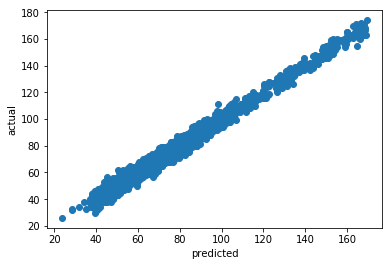

In [43]:
gb_pred = fitted_models['gb'].predict(X_test)
plt.scatter(gb_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [44]:
submission = pd.DataFrame(fitted_models['gb'].predict(test_attributes), index=test_attributes.index, columns=['AveMonthSpend'])
submission.to_csv('avemonthspend_predictions.csv')

C:\Users\jpkel\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


The root mean squared error for the submitted results was 3.4132.